# BASTRA NOTEBOOK

En este *notebook* vamos a trabajar con los datos generados por las simulaciones de BASTRA.
Los datos se agruparán por escenarios.

Autor: Alvaro Paricio. sept.2016

## Preliminares

Antes de ejecutar los escenarios es preciso hacer las correspondienes importaciones de módulos de python para cálculo científico.

### Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sklearn as sk
import pandas as pd

### Function declarations

## Escenario TAPAS

(incluir la descripción)

In [2]:
dir = "/Users/alvaro/Desktop/workspace/mutraff/uah-gist-mutraff-bastra/"
# experiment = "data_TAPAS_160923_105800"
experiment = "data_Grid_160926_124432"
datafile = dir + "/" + experiment + "/statistics.dat"

# ds = dataset
ds_raw = pd.read_csv(datafile)
ds_raw.head()

,id,t_depart_secs,t_arrival_secs,t_traveltime_secs,origin,destiny,route_detail,route_path_num,is_attended,has_finished
0,2304,0,241,241,1/11to2/11,11/3to12/3,1/11to2/11:2/11to3/11:3/11to4/11:4/11to5/11:5/...,19,False,True
1,3126,0,161,161,bottom7to7/0,10/9to10/10,bottom7to7/0:7/0to7/1:7/1to7/2:7/2to7/3:7/3to7...,14,True,True
2,74,0,373,373,left15to0/15,15/0tobottom15,left15to0/15:0/15to0/14:0/14to0/13:0/13to0/12:...,32,True,True
3,65,0,382,382,left15to0/15,15/0tobottom15,left15to0/15:0/15to0/14:0/14to0/13:0/13to0/12:...,32,True,True
4,690,0,35,35,13/7to14/7,14/6to14/5,13/7to14/7:14/7to14/6:14/6to14/5:,3,True,True


Process and prepare data in ds "dataset":
    * Select those cars that finish the trip, i.e. have arrive time > 0.

In [3]:
ds = ds_raw.loc[ ds_raw['t_arrival_secs'] > 0 ]
ds.head()

,id,t_depart_secs,t_arrival_secs,t_traveltime_secs,origin,destiny,route_detail,route_path_num,is_attended,has_finished
0,2304,0,241,241,1/11to2/11,11/3to12/3,1/11to2/11:2/11to3/11:3/11to4/11:4/11to5/11:5/...,19,False,True
1,3126,0,161,161,bottom7to7/0,10/9to10/10,bottom7to7/0:7/0to7/1:7/1to7/2:7/2to7/3:7/3to7...,14,True,True
2,74,0,373,373,left15to0/15,15/0tobottom15,left15to0/15:0/15to0/14:0/14to0/13:0/13to0/12:...,32,True,True
3,65,0,382,382,left15to0/15,15/0tobottom15,left15to0/15:0/15to0/14:0/14to0/13:0/13to0/12:...,32,True,True
4,690,0,35,35,13/7to14/7,14/6to14/5,13/7to14/7:14/7to14/6:14/6to14/5:,3,True,True


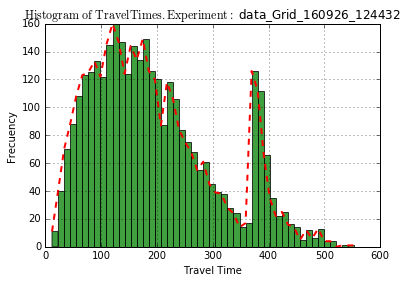

In [12]:
travel_times = ds['t_traveltime_secs']
# plt.hist(travel_times, bins=np.arange(travel_times.min(), travel_times.max()+1))
cols = 50
y_vals, x_bins, patches = plt.hist(travel_times, cols, normed=0, facecolor='green', alpha=0.75)

# add a 'best fit' line
y1_vals = np.append( y_vals, y_vals[cols-1] )
# print( "X-VALS: ", len(x_bins), " ", x_bins.__repr__, "\n", x_bins, )
# print( "Y_VALS: ", len(y1_vals), " ", y1_vals.__repr__, "\n", y1_vals )
l = plt.plot(x_bins, y1_vals, 'r--', linewidth=2)

plt.xlabel('Travel Time')
plt.ylabel('Frecuency')
plt.title(r'$\mathrm{Histogram\ of\ Travel Times. Experiment: }\ $' + experiment )

# plt.axis([travel_times.min(), travel_times.max()+1, 0, 0.03])
plt.grid(True)

# If plotting OUTSIDE the notebook, set interactive mode ON/OFF
# plt.ioff()
# plt.ion()

plt.show()